In [92]:
import os
print(os.getcwd())

/teamspace/studios/this_studio/Group-Activity-Recognition/src/BaseLines/BaseLine2_PersonClassification/NoteBooks


In [93]:
import  sys
sys.path.append(os.path.abspath("../../../../"))  

In [94]:
import random, shutil, pickle
from pathlib import Path
from src.enums.PathEnums import Paths

In [95]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [96]:
def plot_image(image_path, player_box, label):


    
    img = Image.open(image_path)
    x1, y1, x2, y2 = player_box
    img = img.crop((x1, y1, x2, y2))

    img_as_array = np.array(img)

    print(f"Image path: {image_path}")
    print(f"Image class: {label}")
    print(f"Image shape: {img_as_array.shape}")
    plt.imshow(img_as_array)
    plt.title(f" '{label}' class")
    plt.axis('off')

In [97]:
def plot_images(data, boxes, labels, transformed=False):

    n = len(data)
    fig, axes = plt.subplots(1, n, figsize=(n * 5, 5))  

    if n == 1:
        axes = [axes]  # If only 1 image, make sure axes is iterable

    if transformed:

        for i, (img, label) in enumerate(zip(data, labels)):
            # img = img.permute(1, 2, 0)
            img = Image.open(img)
            x1, y1, x2, y2 = boxes[i]
            img = img.crop((x1, y1, x2, y2))

            axes[i].imshow(img)
            axes[i].set_title(f"Image {label}")
            axes[i].axis("off")

    else:

        for i, image_path in enumerate(data):
            img = Image.open(image_path)
            x1, y1, x2, y2 = boxes[i]
            img = img.crop((x1, y1, x2, y2))
            axes[i].imshow(img)
            axes[i].set_title(f"Image {labels[i]}")
            axes[i].axis("off")

    # plt.suptitle(f"Random Images from '{category}' class", fontsize=16)
    plt.show()

In [98]:
with open("../../../../datapkl/annot_all.pkl", "rb") as f:
    data = pickle.load(f)

print(type(data))
print(len(data))

<class 'dict'>
55


In [99]:
splits ={"train":[], "valid":[], "test":[], "all":[]}
labels = set()
# ----------------------------------------------------------------------------------------------------
train_ids = ["1", "3", "6", "7", "10", "13", "15", "16", "18", "22", "23", "31",
            "32", "36", "38", "39", "40", "41", "42", "48", "50", "52", "53", "54"]

val_ids = ["0", "2", "8", "12", "17", "19", "24", "26", "27", "28", "30", "33", "46", "49", "51"]
# ----------------------------------------------------------------------------------------------------

with open("../../../../datapkl/annot_all.pkl", "rb") as f:
    videos_annot_dct = pickle.load(f)


for video_id, clips in videos_annot_dct.items(): # each video
    video_id_str = str(video_id)

    if video_id_str in train_ids:
        split_name = "train"
    elif video_id_str in val_ids:
        split_name = "valid"
    else:
        split_name = "test"
    # print(video_id_str)

    for clip_id, clip_data in clips.items():     # each clip
        for frame_id, boxes in clip_data["frame_boxes_dct"].items():    # Frames
            # print(len(boxes), video_id, clip_id, frame_id, boxes)  # 12 Box (Players)
            frame_path = f"{Paths.VIDEOS_ROOT.value}/{video_id}/{clip_id}/{frame_id}.jpg"
            frame_path = os.path.join("../../../../", frame_path)
            # print(frame_path)
            for box in boxes:
                labels.add(box.category)

                record = {
                    "frame path": frame_path,
                    "player box": box.box,
                    "category": box.category,
                }

                splits[split_name].append(record)
                splits["all"].append(record)

random.shuffle(splits["train"])
random.shuffle(splits["valid"])
random.shuffle(splits["test"])
random.shuffle(splits["all"])

print(f"Train: {len(splits['train'])}, "
      f"Valid: {len(splits['valid'])}, "
      f"Test: {len(splits['test'])}, "
      f"All: {len(splits['all'])}")

# Train: 231327, Valid: 143829, Test: 143406, All: 518562

Train: 231327, Valid: 143829, Test: 143406, All: 518562


In [100]:
train_split = splits['train']
valid_split = splits['valid']
test_split = splits['test']


In [101]:
frame_path = train_split[0]['frame path']
player_box = train_split[0]['player box']
category = train_split[0]['category']
print(frame_path, "\n", player_box, "\n", category)


../../../../data/volleyball/volleyball_/videos/52/11395/11396.jpg 
 (324, 460, 393, 594) 
 waiting


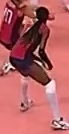

In [102]:
img = Image.open(frame_path)
x1, y1, x2, y2 = player_box
cropped = img.crop((x1, y1, x2, y2))  # (left, upper, right, lower)

cropped.show(title=category)

Image path: ../../../../data/volleyball/volleyball_/videos/52/11395/11396.jpg
Image class: waiting
Image shape: (134, 69, 3)


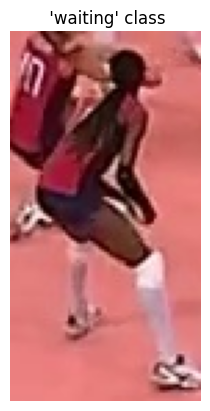

In [103]:
plot_image(frame_path, player_box, category)


In [104]:
frame_path = test_split[0]['frame path']
player_box = test_split[0]['player box']
category = test_split[0]['category']
print(frame_path, "\n", player_box, "\n", category)

../../../../data/volleyball/volleyball_/videos/29/5585/5588.jpg 
 (415, 371, 455, 503) 
 standing


In [105]:
lst_path_train1, lst_box_train1, lst_label_train1 = [], [], []

i=0
for d in train_split:
    frame_path = d['frame path']
    player_box = d['player box']
    category = d['category']


    lst_path_train1.append(frame_path)
    lst_box_train1.append(player_box)
    lst_label_train1.append(category)
    print(d)
    i+=1
    if i==3:
        break

{'frame path': '../../../../data/volleyball/volleyball_/videos/52/11395/11396.jpg', 'player box': (324, 460, 393, 594), 'category': 'waiting'}
{'frame path': '../../../../data/volleyball/volleyball_/videos/23/90130/90126.jpg', 'player box': (747, 433, 818, 566), 'category': 'standing'}
{'frame path': '../../../../data/volleyball/volleyball_/videos/16/29610/29607.jpg', 'player box': (140, 334, 210, 456), 'category': 'standing'}


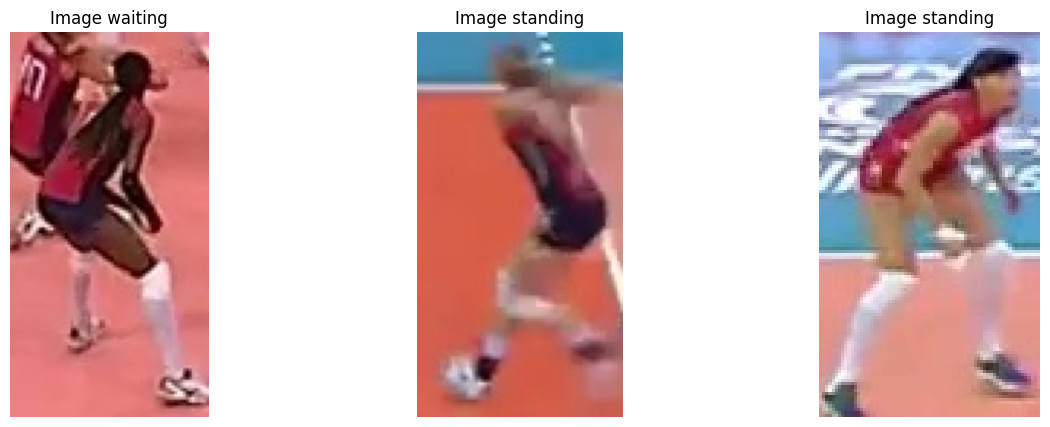

In [106]:
plot_images(lst_path_train1, lst_box_train1, lst_label_train1)

In [107]:
from src.enums.PathEnums import Paths
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from pathlib import Path
from PIL import Image
import os

In [108]:
class CustomDataset(Dataset):
    def __init__(self, data_split, labels, transform=None):
        
        self.data_split = data_split
        self.labels = labels
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(labels)}
        self.transform = transform

    def __len__(self):

        return len(self.data_split)

    def __getitem__(self, idx):

        item = self.data_split[idx]


        img = Image.open(item['frame path']).convert("RGB")
        player_box = item['player box']
        x1, y1, x2, y2 = player_box

        cropped = img.crop((x1, y1, x2, y2))
        # print("caopped :" , cropped)  # caopped : <PIL.Image.Image image mode=RGB size=80x122 at 0x7FAED50E0100>

        label = self.class_to_idx[item['category']]
        
        # print(item['frame path'], "\n", player_box, "\n", label)
 

        if self.transform:
            cropped = self.transform(cropped)

        # return item['frame path'], player_box, label # For DEBUG Only (Remove this [FAWZY])
        return cropped, label

In [109]:
train_transforms = data_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomApply([
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1)
        ], p=0.3),
        transforms.RandomGrayscale(p=0.05),
        transforms.RandomApply([
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0))
        ], p=0.3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

test_transforms = data_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

train_dataset = CustomDataset(train_split, labels, transform=train_transforms)
valid_dataset = CustomDataset(valid_split, labels, transform=test_transforms)
test_dataset  = CustomDataset(test_split,  labels, transform=test_transforms)

print(f"len train : {len(train_dataset)}")
print(f"len valid : {len(valid_dataset)}")
print(f"len test : {len(test_dataset)}")  

print(valid_dataset.labels)
print(valid_dataset.class_to_idx)
print("="*50, "\n")

# Train: 231327, Valid: 143829, Test: 143406, All: 518562

len train : 231327
len valid : 143829
len test : 143406
{'setting', 'falling', 'waiting', 'standing', 'moving', 'blocking', 'jumping', 'spiking', 'digging'}
{'setting': 0, 'falling': 1, 'waiting': 2, 'standing': 3, 'moving': 4, 'blocking': 5, 'jumping': 6, 'spiking': 7, 'digging': 8}



In [110]:
# cropped, label = train_dataset[0]

In [111]:
# frame_path, player_box, label

In [112]:
lst_path_train1, lst_box_train1, lst_label_train1 = [], [], []
lst_path_train2, lst_box_train2, lst_label_train2 = [], [], []
classes = list(train_dataset.labels)
print(classes[0])
i=0
for d in train_split:
    frame_path = d['frame path']
    player_box = d['player box']
    category = d['category']


    lst_path_train1.append(frame_path)
    lst_box_train1.append(player_box)
    lst_label_train1.append(category)
    print(d)
    i+=1
    if i==3:
        break
print("===="*30)
for i, d in enumerate(train_dataset):
    lst_path_train2.append(d[0])
    lst_box_train2.append(d[1]) 
    lst_label_train2.append(classes[int(d[2])])
    print(d)
    i+=1
    if i==3:
        break

setting
{'frame path': '../../../../data/volleyball/volleyball_/videos/52/11395/11396.jpg', 'player box': (324, 460, 393, 594), 'category': 'waiting'}
{'frame path': '../../../../data/volleyball/volleyball_/videos/23/90130/90126.jpg', 'player box': (747, 433, 818, 566), 'category': 'standing'}
{'frame path': '../../../../data/volleyball/volleyball_/videos/16/29610/29607.jpg', 'player box': (140, 334, 210, 456), 'category': 'standing'}


IndexError: tuple index out of range

In [67]:
train_dataset.class_to_idx

{'setting': 0,
 'falling': 1,
 'waiting': 2,
 'standing': 3,
 'moving': 4,
 'blocking': 5,
 'jumping': 6,
 'spiking': 7,
 'digging': 8}

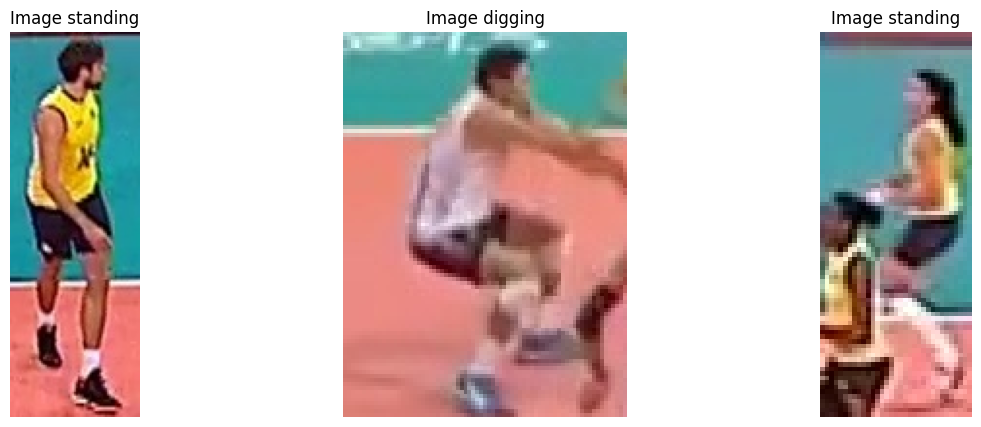

In [ ]:
plot_images(lst_path_train1, lst_box_train1, lst_label_train1)

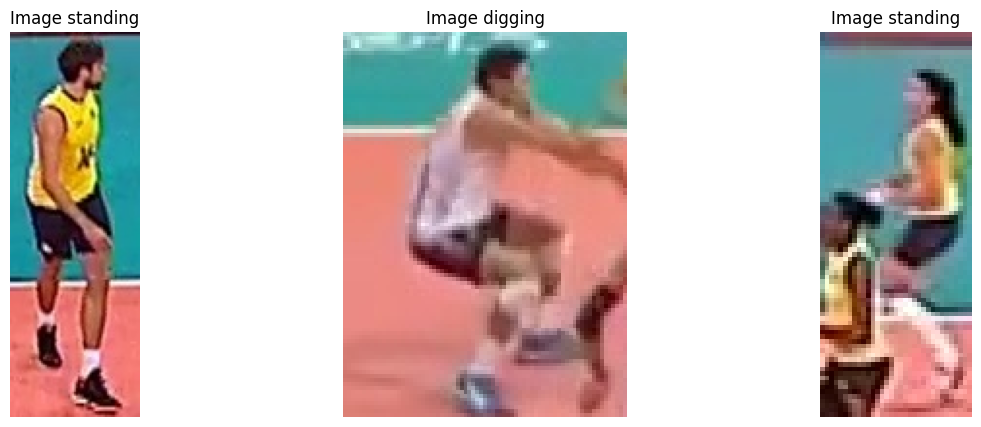

In [69]:
plot_images(lst_path_train2, lst_box_train2, lst_label_train2)

In [ ]:
lst_path_train1, lst_box_train1, lst_label_train1 = [], [], []
lst_path_train2, lst_box_train2, lst_label_train2 = [], [], []
classes = list(train_dataset.labels)

i=0
for d in test_split:
    frame_path = d['frame path']
    player_box = d['player box']
    category = d['category']


    lst_path_train1.append(frame_path)
    lst_box_train1.append(player_box)
    lst_label_train1.append(category)
    print(d)
    i+=1
    if i==3:
        break
print("===="*30)
for i, d in enumerate(test_dataset):
    lst_path_train2.append(d[0])
    lst_box_train2.append(d[1]) 
    lst_label_train2.append(classes[int(d[2])])
    print(d)
    i+=1
    if i==3:
        break
# ../../../../data/volleyball/volleyball_/videos/44/22095/22096.jpg 
#  (937, 641, 1020, 848) 
#  standing

{'frame path': '../../../../data/volleyball/volleyball_/videos/44/22095/22096.jpg', 'player box': (937, 641, 1020, 848), 'category': 'standing'}
{'frame path': '../../../../data/volleyball/volleyball_/videos/29/52630/52625.jpg', 'player box': (507, 322, 563, 437), 'category': 'standing'}
{'frame path': '../../../../data/volleyball/volleyball_/videos/34/43045/43045.jpg', 'player box': (875, 319, 906, 426), 'category': 'standing'}
('../../../../data/volleyball/volleyball_/videos/44/22095/22096.jpg', (937, 641, 1020, 848), 3)
('../../../../data/volleyball/volleyball_/videos/29/52630/52625.jpg', (507, 322, 563, 437), 3)
('../../../../data/volleyball/volleyball_/videos/34/43045/43045.jpg', (875, 319, 906, 426), 3)


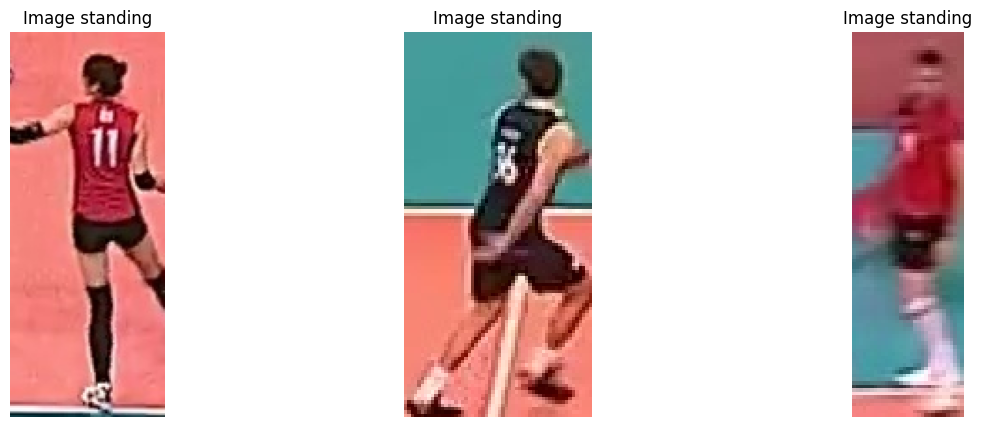

In [71]:
plot_images(lst_path_train1, lst_box_train1, lst_label_train1)

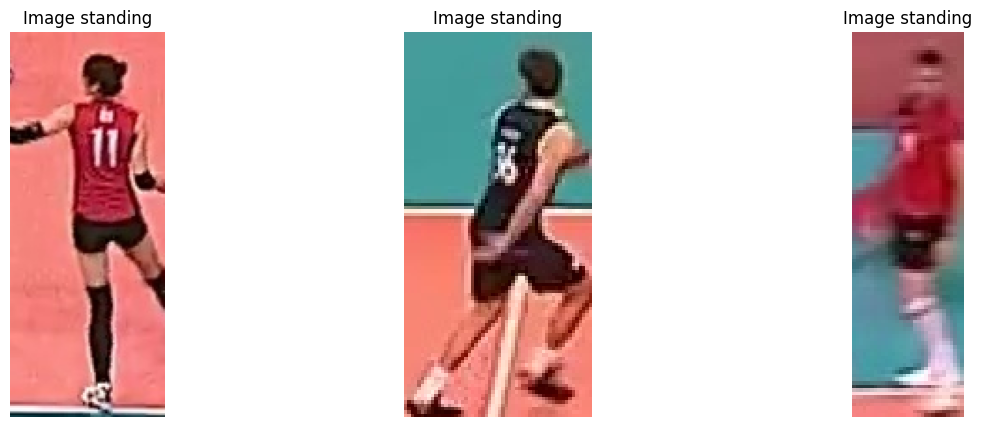

In [72]:
plot_images(lst_path_train2, lst_box_train2, lst_label_train2)

In [74]:
lst_path_train1, lst_box_train1, lst_label_train1 = [], [], []
lst_path_train2, lst_box_train2, lst_label_train2 = [], [], []
classes = list(train_dataset.labels)

i=0
for d in valid_split:
    frame_path = d['frame path']
    player_box = d['player box']
    category = d['category']


    lst_path_train1.append(frame_path)
    lst_box_train1.append(player_box)
    lst_label_train1.append(category)
    print(d)
    i+=1
    if i==3:
        break
print("===="*30)
for i, d in enumerate(valid_dataset):
    lst_path_train2.append(d[0])
    lst_box_train2.append(d[1]) 
    lst_label_train2.append(classes[int(d[2])])
    print(d)
    i+=1
    if i==3:
        break


{'frame path': '../../../../data/volleyball/volleyball_/videos/17/26745/26748.jpg', 'player box': (713, 445, 760, 589), 'category': 'blocking'}
{'frame path': '../../../../data/volleyball/volleyball_/videos/0/55384/55386.jpg', 'player box': (1097, 346, 1165, 483), 'category': 'standing'}
{'frame path': '../../../../data/volleyball/volleyball_/videos/27/34725/34723.jpg', 'player box': (455, 311, 503, 433), 'category': 'standing'}
('../../../../data/volleyball/volleyball_/videos/17/26745/26748.jpg', (713, 445, 760, 589), 5)
('../../../../data/volleyball/volleyball_/videos/0/55384/55386.jpg', (1097, 346, 1165, 483), 3)
('../../../../data/volleyball/volleyball_/videos/27/34725/34723.jpg', (455, 311, 503, 433), 3)


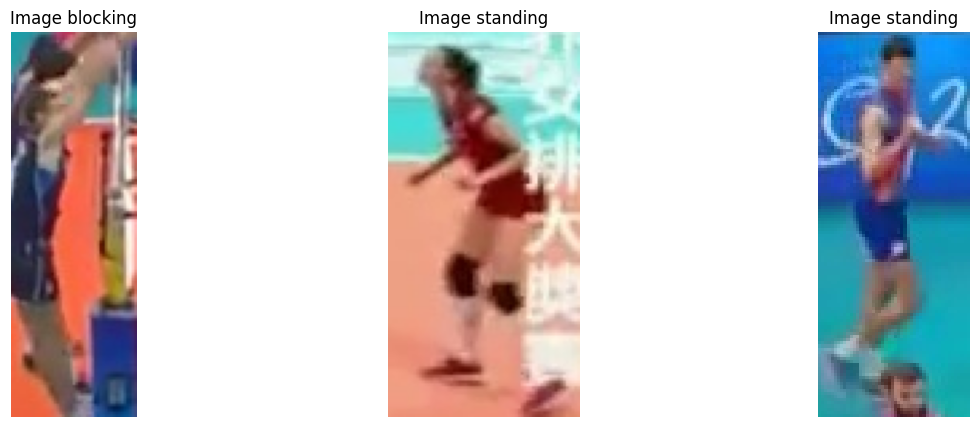

In [88]:
plot_images(lst_path_train1, lst_box_train1, lst_label_train1)

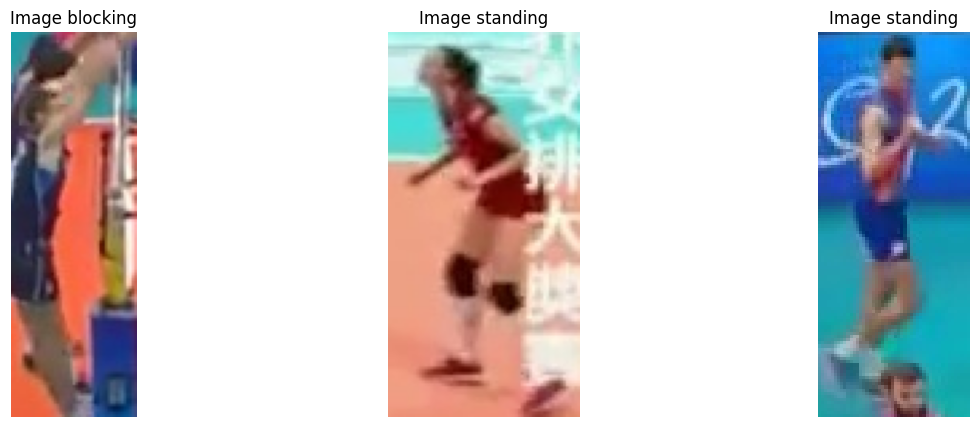

In [ ]:
plot_images(lst_path_train2, lst_box_train2, lst_label_train2, True)

In [77]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
valid_dataloader = DataLoader(valid_dataset, batch_size=64, shuffle=False, num_workers=4)
test_dataloader  = DataLoader(test_dataset,  batch_size=64, shuffle=False, num_workers=4)